In [8]:
import numpy as np
import glob
%pylab inline
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import rcParams
import os.path
from os import path
from PIL import Image

Populating the interactive namespace from numpy and matplotlib


In [5]:
# read SASA data, which were computed using VMD for all residues within 4.5 Å from each atom at an KRas dimer interface
SASA=np.loadtxt('SASA_selected_interface.dat',unpack=True,usecols=(3),skiprows=1)
alltraj=np.loadtxt('SASA_selected_interface.dat',unpack=True,usecols=(0),dtype='str',skiprows=1)
SASA_vs_traj={}
for traj,sasa in zip(alltraj,SASA):
    SASA_vs_traj[traj]=sasa
    print(traj,sasa)

37_41_90 7452.5
1_1_90 4214.62
21_21_0 6767.4400000000005
5_21_0 11099.259999999998
1_21_180 9642.36
17_41_90 6054.73
21_33_90 6433.57
21_37_90 6322.58
5_37_90 4064.22
37_37_90 7643.88
25_37_180 5869.59
21_21_90 10074.560000000001
41_41_90 6645.87
17_21_90 4759.8
13_21_0 6774.38
25_41_90 6409.59
5_13_90 10797.7
37_41_0 7780.7
25_25_90 11106.130000000001
25_41_180 6908.74
13_13_180 8473.57
1_25_0 4702.77
21_25_180 6497.23
1_21_90 5443.2
17_33_0 5815.91


In [6]:
# This is 25 selected interfaces, ranked by SASA.
a = sorted(SASA_vs_traj.items(), key=lambda x: x[1])
ordered_structures=np.flip(a)
print(ordered_structures)

[['11106.130000000001' '25_25_90']
 ['11099.259999999998' '5_21_0']
 ['10797.7' '5_13_90']
 ['10074.560000000001' '21_21_90']
 ['9642.36' '1_21_180']
 ['8473.57' '13_13_180']
 ['7780.7' '37_41_0']
 ['7643.88' '37_37_90']
 ['7452.5' '37_41_90']
 ['6908.74' '25_41_180']
 ['6774.38' '13_21_0']
 ['6767.4400000000005' '21_21_0']
 ['6645.87' '41_41_90']
 ['6497.23' '21_25_180']
 ['6433.57' '21_33_90']
 ['6409.59' '25_41_90']
 ['6322.58' '21_37_90']
 ['6054.73' '17_41_90']
 ['5869.59' '25_37_180']
 ['5815.91' '17_33_0']
 ['5443.2' '1_21_90']
 ['4759.8' '17_21_90']
 ['4702.77' '1_25_0']
 ['4214.62' '1_1_90']
 ['4064.22' '5_37_90']]


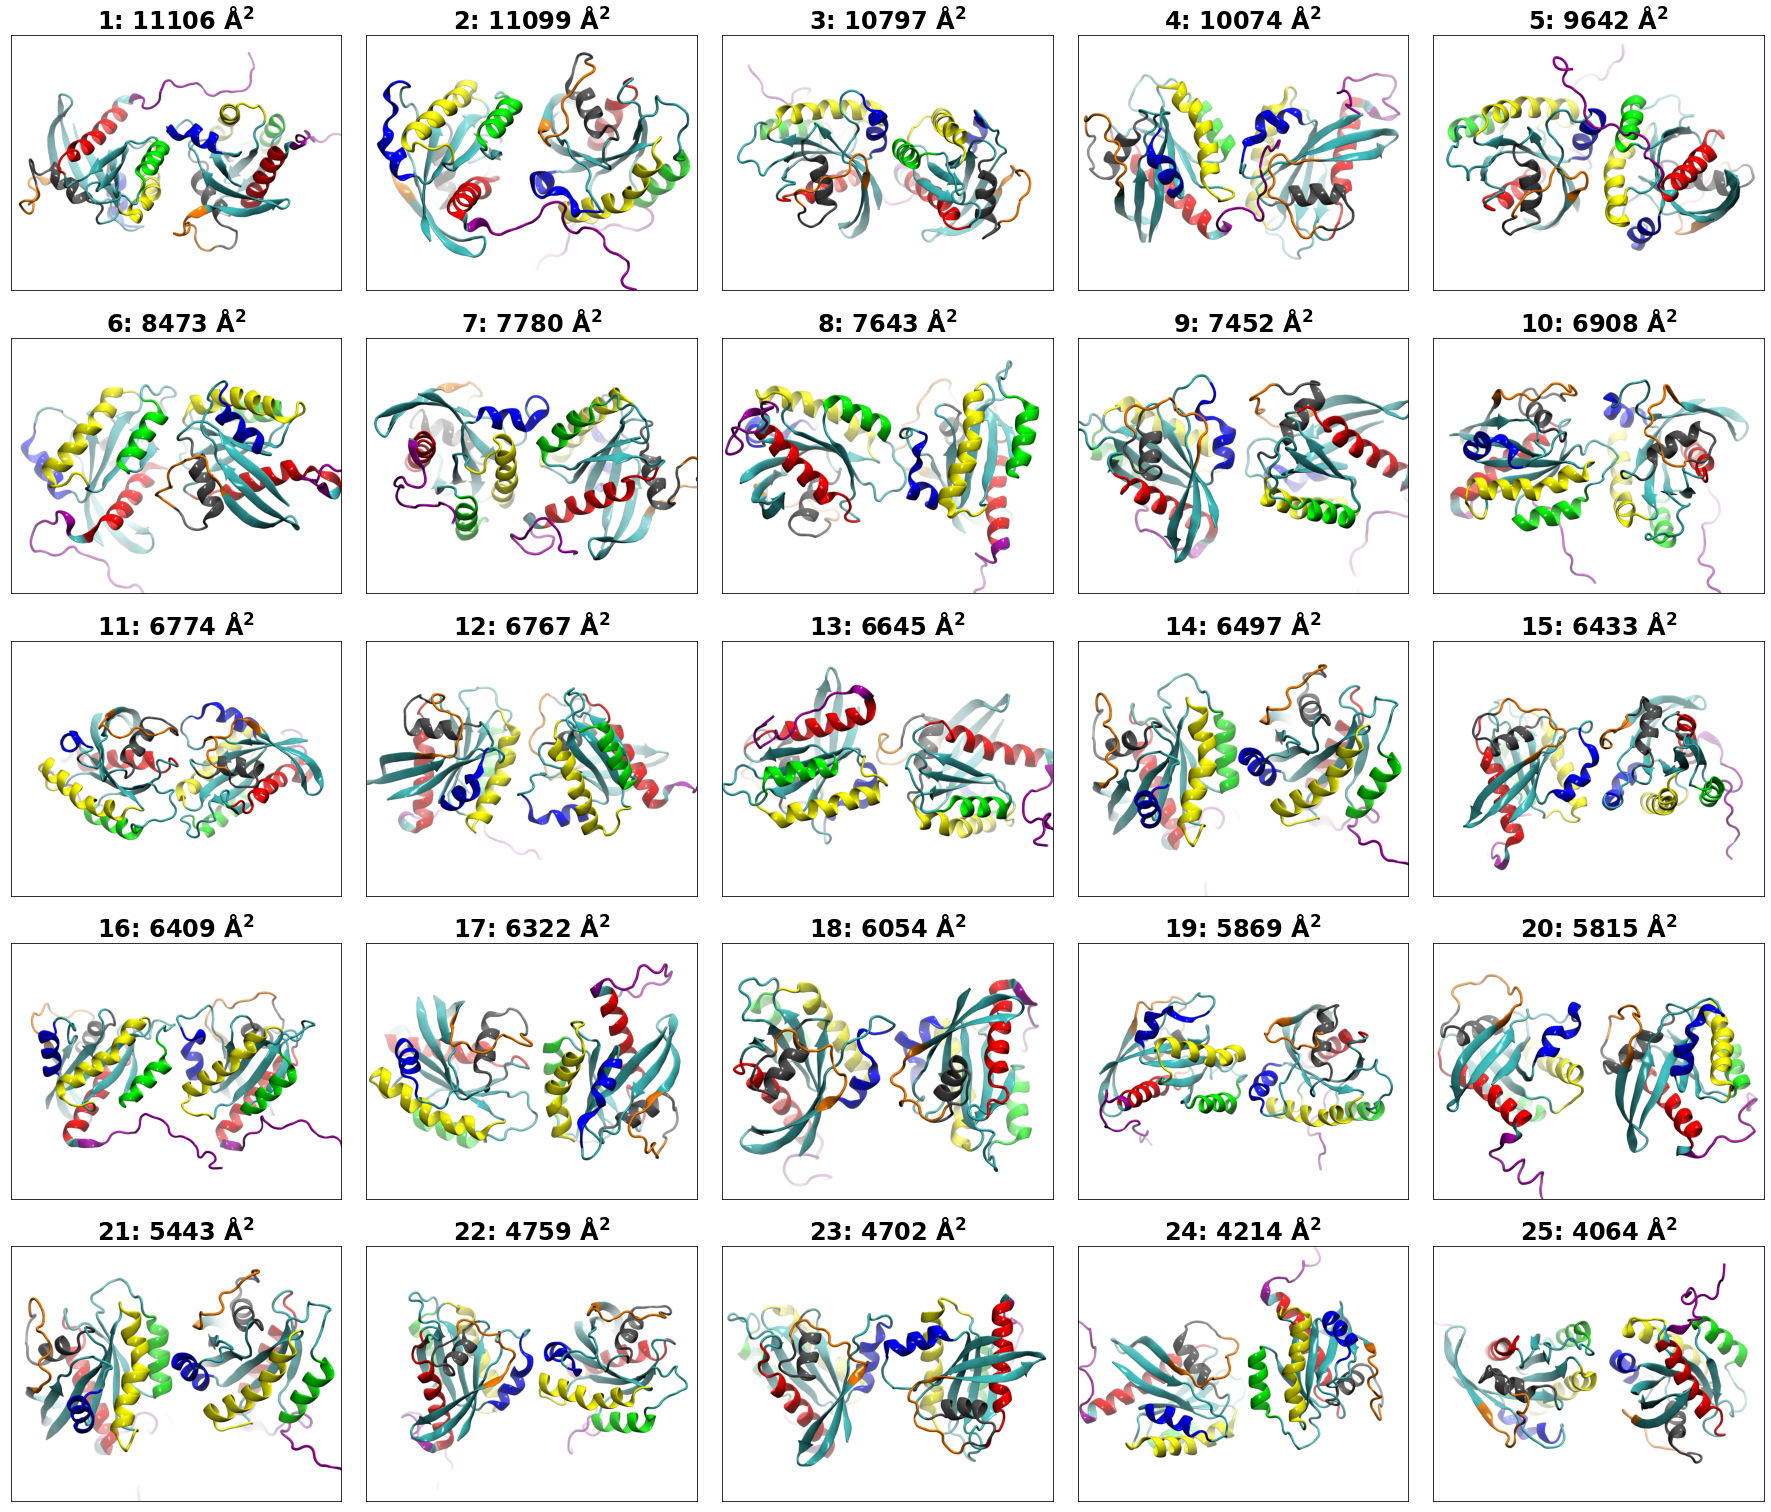

In [10]:
# put all 25 ordered structures into a picture
#import cv2
plt.rc('font',size=20,weight='bold')
fig,ax=plt.subplots(5,5,figsize=(25,25),sharex=True,sharey=True)
fig.subplots_adjust(left=0.1, bottom=0.5, right=0.2, top=1.4, wspace=0,hspace=0)
count=0
for item in ordered_structures:
    x=int(count/5)
    y=count % 5
    iax=ax[x][y]
    sasa=item[0].split('.')[0]
    structure=item[1]
    png='png_25_out_25/'+structure+'.png'
    image=Image.open(png)
    iax.imshow(image)
    iax.axes.xaxis.set_visible(False)
    iax.axes.yaxis.set_visible(False)
    
    iax.axes.xaxis.set_ticks([])
    iax.axes.yaxis.set_ticks([])
    
    iax.axes.xaxis.set_ticklabels([])
    iax.axes.yaxis.set_ticklabels([])
    
    
    iax.set_title (str(count+1)+': '+sasa+' $\mathrm{Å}^2$',weight='bold')
    count+=1
plt.tight_layout()
#plt.savefig('25selected_structure_ranked_bySASA.png',dpi=300,bbox_inches='tight')

